In [1]:
%load_ext autoreload
%autoreload 1
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
from progressbar import progressbar
savePNG = False ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExtension = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExtension = str('.pdf')

notebookPlotFlag = False ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [15]:
## original data with least_squares
tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2].reset_index(drop=True)
tess_2020bpi_norm = normLC(tess_2020bpi)
tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()

#tess_2020bpi.head()
## Fausnaugh Updated Data with least_squares
tess_2020bpi_a = pd.read_csv('JhaData/TESS_SN2020bpi_updated.csv')
tess_2020bpi_a_norm = normLC(tess_2020bpi_a)

## Original Data with MCMC (only sector21)
tess_2020bpi_s21_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_MCMC.csv')
tess_2020bpi_s21_mcmc_norm = normLC(tess_2020bpi_s21_mcmc)

## Fausnaugh Updated Data with MCMC (only sector21)
tess_2020bpi_s21_a_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
tess_2020bpi_s21_a_mcmc_norm = normLC(tess_2020bpi_s21_a_mcmc)
# tess_2020bpi_s21_a_mcmc_norm_smol = tess_2020bpi_s21_a_mcmc_norm.copy()
# rolling_flux = tess_2020bpi_s21_a_mcmc_norm_smol['flux'].rolling(24).median().min()
# tess_2020bpi_s21_a_mcmc_norm_smol = tess_2020bpi_s21_a_mcmc_norm_smol.query('flux_roll < 1')
tess_2020bpi_s21_a_mcmc_prime = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
tess_2020bpi_s21_a_mcmc_prime_norm = normLC(tess_2020bpi_s21_a_mcmc_prime)

##ZTF Data
ztf_2020bpi = pd.read_csv('./JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 0.4*np.max(ztf_2020bpi['flux'])
print(fluxNorm)
# display(type(eval(ztf_2020bpi['e_flux_tuple'][0])[0]))
ztf_2020bpi_norm = normLC(ztf_2020bpi)
# ztf_2020bpi['flux'] = [ab.band_mag_to_flux(ztf_2020bpi['magap'][i], 'ztfr') for i in range(len(ztf_2020bpi['magap']))]
# ztf_2020bpi['e_flux'] = [
#     np.mean(ast.literal_eval(flux))
#     for flux in ztf_2020bpi['e_flux'].to_numpy()]
# ztf_2020bpi['e_flux_tuple'] = [eval(item) for item in ztf_2020bpi.e_flux.to_numpy()]
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
# ztf_2020bpi['e_flux'] = [eval(item) for item in ztf_2020bpi.e_flux.to_numpy()]
# ztf_2020bpi['e_flux'] = [
#     np.mean(ast.literal_eval(flux))
#     for flux in ztf_2020bpi['e_flux'].to_numpy()
#                         ]

display(tess_2020bpi_a_norm)
display(ztf_2020bpi_norm)


0.03958767421182158


,BTJD,mjd,cts,e_cts,bkg_model,raw_flux,e_raw_flux,bkg_model_flux,flux,e_flux,mjd_0
0,1870.44408,58869.94408,-5339.0302,1368.8706,1472.5589,-0.774561,0.198589,0.008457,0.010148,0.190260,0.00000
1,1870.46491,58869.96491,-6841.1413,1375.3282,1472.5589,-0.992480,0.199526,0.008457,-0.198631,0.191158,0.02083
2,1870.48574,58869.98574,-2219.7583,1400.7610,1472.5589,-0.322032,0.203216,0.008457,0.443698,0.194693,0.04166
3,1870.50658,58870.00658,-10843.6913,1370.6601,1472.5589,-1.573151,0.198849,0.008457,-0.754948,0.190509,0.06250
4,1870.52741,58870.02741,-9069.4821,1365.9754,1472.5589,-1.315757,0.198169,0.008457,-0.508350,0.189858,0.08333
...,...,...,...,...,...,...,...,...,...,...,...
2402,1926.38043,58925.88043,-3943.5868,1104.1300,-114.3956,-0.572117,0.160182,-0.000657,1.260438,0.083665,55.93635
2403,1926.40126,58925.90126,-824.5015,1094.5396,-114.3956,-0.119615,0.158791,-0.000657,1.496785,0.082938,55.95718
2404,1926.42209,58925.92209,-4053.7044,1096.5736,-114.3956,-0.588092,0.159086,-0.000657,1.252093,0.083092,55.97801
2405,1926.44293,58925.94293,-4965.5355,1080.8779,-114.3956,-0.720376,0.156809,-0.000657,1.183000,0.081903,55.99885


,BTJD,mjd,magap,sig_magap,flux,e_flux,e_flux_tuple,mjd_0
0,1879.870567,58879.370567,19.729799,0.2218,0.359303,0.073912,"(0.002628163767600394, 0.003223832161130714)",9.426487
1,1881.011065,58880.511065,19.959801,0.2436,0.290710,0.065773,"(0.0023129338055085068, 0.0028946976073013723)",10.566985
2,1881.031343,58880.531343,19.473101,0.1538,0.455134,0.064688,"(0.0023797689104727814, 0.002741920034638759)",10.587263
3,1881.843854,58881.343854,19.660400,0.2291,0.383019,0.081421,"(0.0028844699689605166, 0.003562099310207071)",11.399774
4,1882.032546,58881.532546,19.363001,0.1425,0.503709,0.066300,"(0.00245268546717093, 0.0027966740782900297)",11.588466
...,...,...,...,...,...,...,...,...
60,1913.956053,58913.456053,18.190201,0.0653,1.483541,0.089279,"(0.0034281041616709904, 0.0036406087655060856)",43.511973
61,1914.886007,58914.386007,18.257299,0.0857,1.394634,0.110196,"(0.004190341876202083, 0.004534500521767668)",44.441927
62,1914.914143,58914.414143,18.423201,0.0892,1.197015,0.098453,"(0.003737510405839528, 0.004057536259113009)",44.470064
63,1915.890868,58915.390868,18.187401,0.0936,1.487372,0.128383,"(0.004863463561853576, 0.005301340084218918)",45.446788


sampling...



done


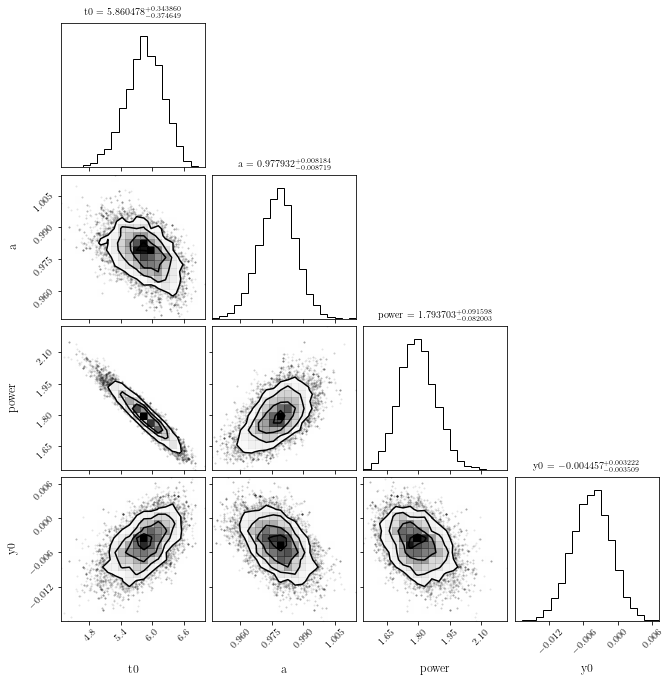

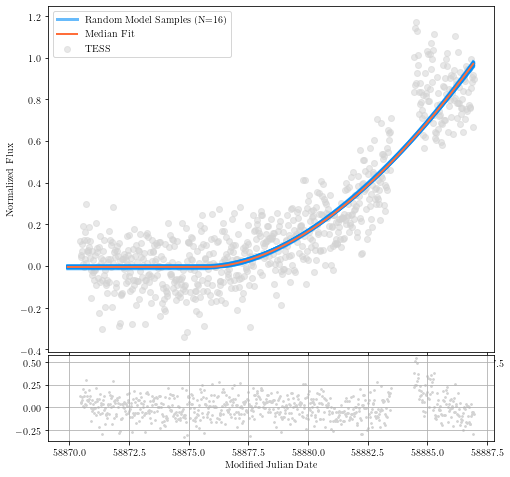

In [10]:
rolling_flux_min = tess_2020bpi_s21_a_mcmc_prime_norm['raw_flux'].rolling(24).median().min()
tess_2020bpi_s21_a_mcmc_prime_zero_norm = tess_2020bpi_s21_a_mcmc_prime_norm[tess_2020bpi_s21_a_mcmc_prime_norm.mjd_0 >0.5].copy()
tess_2020bpi_s21_a_mcmc_prime_zero_norm['raw_flux'] = (tess_2020bpi_s21_a_mcmc_prime_norm['raw_flux'] + abs(rolling_flux_min) -0.263)/3
tess_2020bpi_s21_a_mcmc_prime_zero_norm['e_raw_flux'] = tess_2020bpi_s21_a_mcmc_prime_norm['e_raw_flux']/3

guess = {'t0':6, 'a':1,'power':1.7,'y0':0} 
scale = {'t0':0.1, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_prime_zero_norm, guess, scale, 
                            cutoff=17, nwalkers=8,nburn=100,nsteps=2100,
                            curveModel='dcRaw', 
                        savePlots=False,plotExt='.pdf',
                            plotPal=('lightgrey','#008DF9','#FF6E3A','black'));

sampling...



done


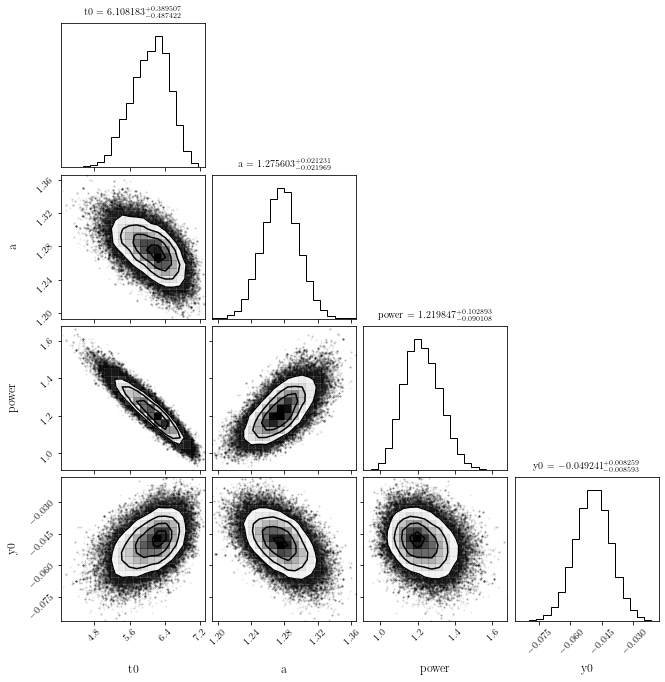

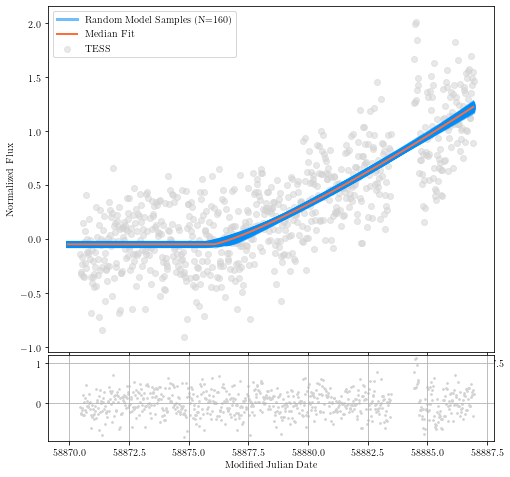

In [11]:
guess = {'t0':7, 'a':1,'power':2,'y0':-0.01} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_prime_norm[tess_2020bpi_s21_a_mcmc_prime_norm.mjd_0>0.5], guess, scale, 
                            cutoff=17, nwalkers=8,nburn=1000,nsteps=21000,
                            curveModel='decoupled',
                        savePlots=False,plotExt='.pdf',
                            plotPal=('lightgrey','#008DF9','#FF6E3A','black'));

sampling...



done


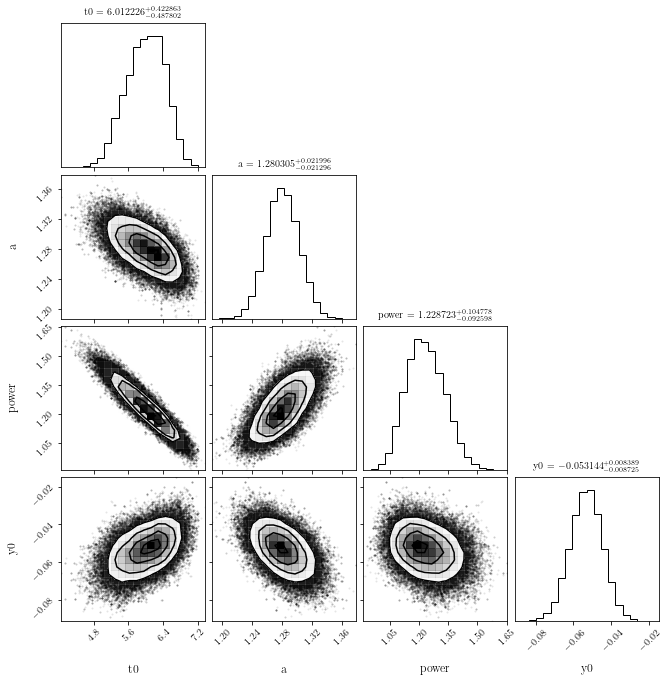

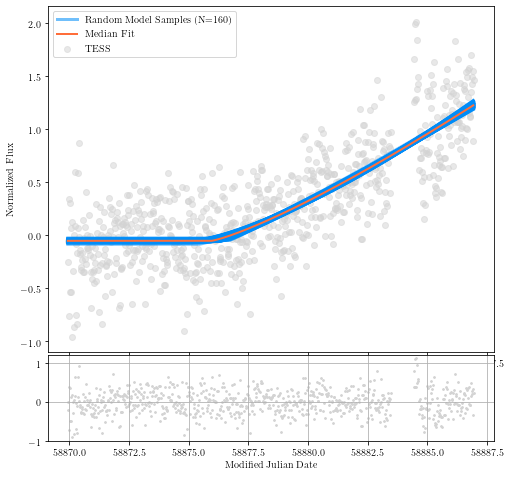

In [12]:
guess = {'t0':6, 'a':1,'power':2,'y0':-0.01} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_prime_norm, guess, scale, 
                            cutoff=17, nwalkers=8,nburn=1000,nsteps=21000,
                            curveModel='decoupled',
                        savePlots=False,plotExt='.pdf',
                            plotPal=('lightgrey','#008DF9','#FF6E3A','black'));

sampling...



done


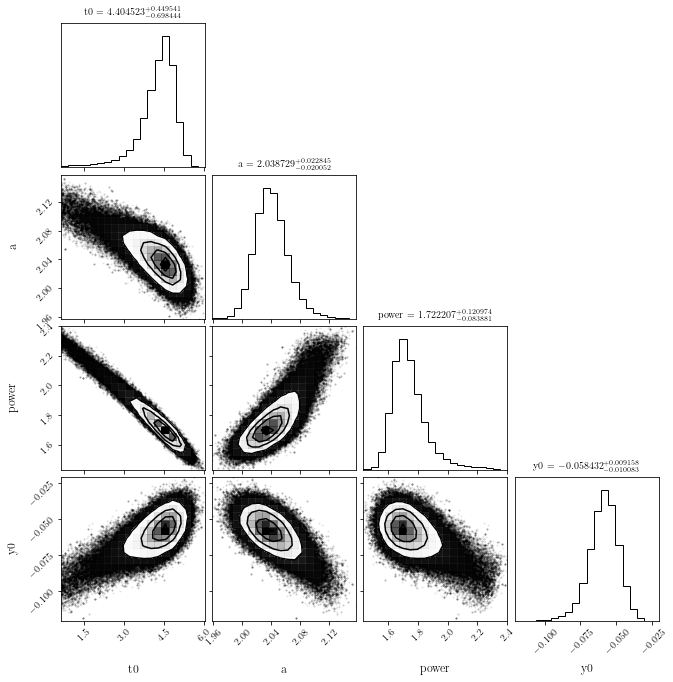

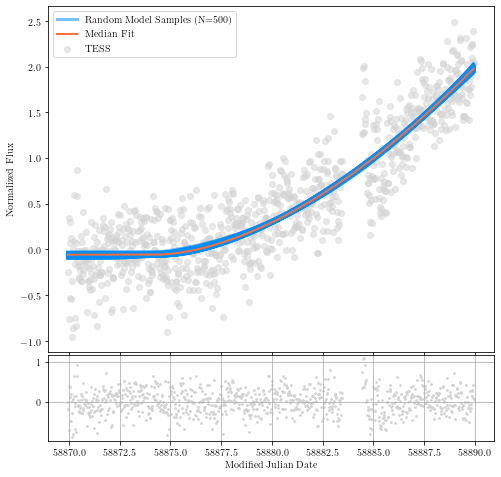

In [13]:
guess = {'t0':6, 'a':1,'power':1.5,'y0':-0.01} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_prime_norm, guess, scale, 
                            cutoff=20, nwalkers=25,nburn=1000,nsteps=21000,
                            curveModel='decoupled',
                        savePlots=False,plotExt='.pdf',
                            plotPal=('lightgrey','#008DF9','#FF6E3A','black'));

sampling...



done


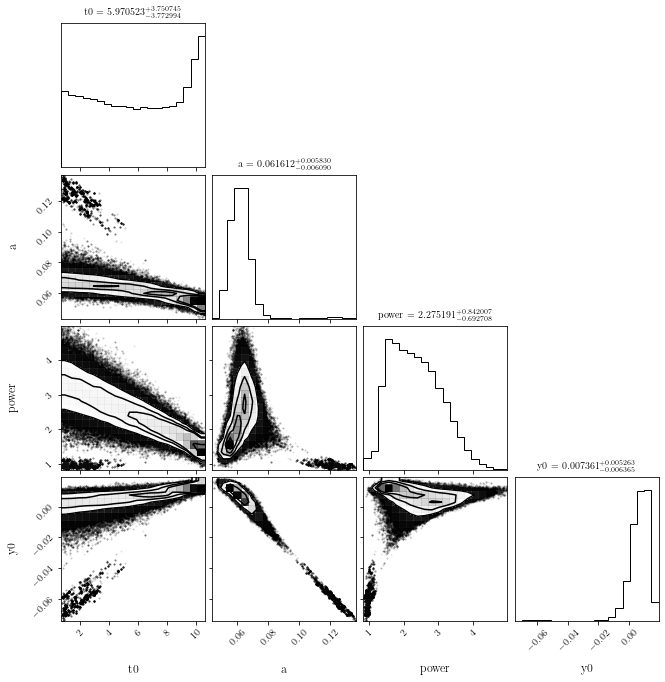

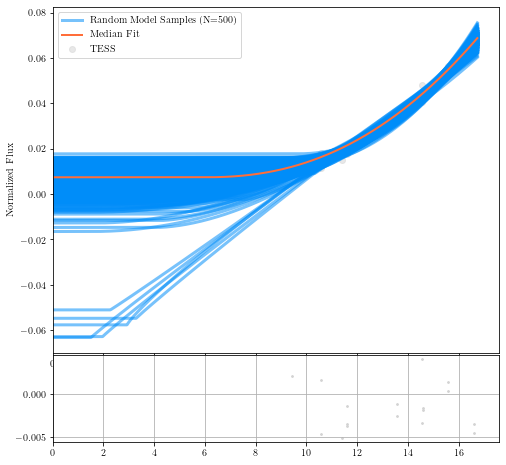

In [9]:
guess = {'t0':7, 'a':1,'power':2,'y0':-0.01} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(ztf_2020bpi, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=1000,nsteps=21000,
                            curveModel='decoupled',
                        savePlots=False,plotExt='.pdf',
                            plotPal=('lightgrey','#008DF9','#FF6E3A','black'));

In [4]:
# ax = tess_2020bpi_norm.plot('mjd_0','flux',yerr='e_flux',color='black',alpha=0.0,kind='scatter',figsize=(10,10),label='Least Squares Old')
# tess_2020bpi_a_norm.plot('mjd_0','flux',yerr='e_flux',color='orange',alpha=0.7,kind='scatter',ax=ax,label='Least Squares New')
# tess_2020bpi_s21_mcmc_norm.plot('mjd_0','flux',yerr='e_flux',color='red',alpha=0.0,kind='scatter',ax=ax,label='MCMC Old')
# tess_2020bpi_s21_a_mcmc_norm.plot('mjd_0','flux',yerr='e_flux',color='teal',alpha=0.7,kind='scatter',ax=ax,label='MCMC New')
# ax.set_xlim(right=1.05*tess_2020bpi_s21_mcmc_norm['mjd_0'].max())
# ax.set_xlabel(r'mjd\_0');

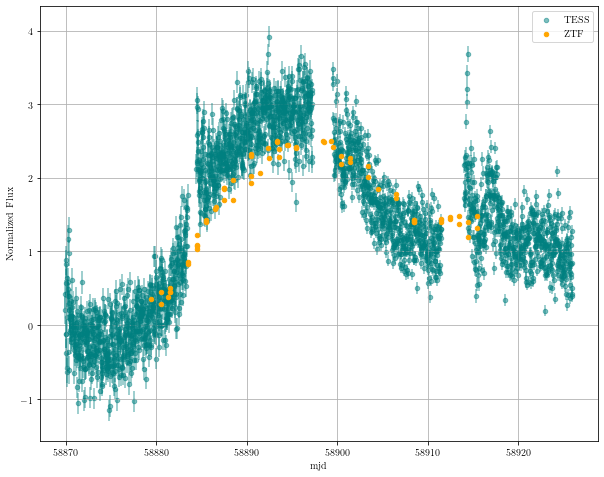

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
tess_2020bpi_norm_shift = tess_2020bpi_norm.copy()
tess_2020bpi_norm_shift['raw_flux'] = tess_2020bpi_norm_shift['raw_flux'] +1.2
tess_2020bpi_norm_shift.plot('mjd','raw_flux',yerr='e_flux',color='teal',alpha=0.5,kind='scatter',label='TESS',zorder=1,ax=ax)
# offsets =[np.array(np.abs(eval(ztf_2020bpi['e_flux_tuple'].to_numpy()[ind][0])),np.abs(eval(ztf_2020bpi['e_flux_tuple'].to_numpy()[ind][1]))) 
#           for ind in range(len(ztf_2020bpi['e_flux_tuple'].to_numpy()))
#          ]
ztf_2020bpi_norm.plot('mjd','flux',color='orange',alpha=1,kind='scatter',ax=ax,label='ZTF',zorder=2)
ax.grid()
# ax.axvline(ztf_2020bpi['mjd'][ztf_2020bpi['flux'].idxmax()],linestyle='--',label='ZTF Peak',color='grey')
ax.legend();
ax.set_ylabel('Normalized Flux');
#fig.savefig('./plots/Normalized_2020bpi_TESS_ZTF_Coverage.pdf');
## Try to get ErrorBars on ZTF

In [3]:
def modelResidual(data, params, percentiles,curveModel,
                  cutoff,dataType='TESS',debug=False,thinParams=100):
    '''
    Finds the residuals of the data for a given set of percentiles
    '''
    if debug:
        print('thinning Params to every '+str(thinParams)+'(th/rd) row')
        start = time.time()
        print('start first loop')
    ind=0
#     rssArray = []
    rssArray = np.array([
        np.sum(np.square(np.array(data.raw_flux - lc_model(sample,params.columns,data,
                                                  curveModel=curveModel,
                                                  cutoff=cutoff)[0]))) 
        if curveModel =='dcRaw' else
        np.sum(np.square(np.array(data.flux - lc_model(sample,params.columns,data,
                                                  curveModel=curveModel,
                                                  cutoff=cutoff)[0]))) 
        for sample in params[::thinParams].to_numpy()
    ])
    
    if debug:
        end = time.time()
        print('first loop: '+str(end-start))
        start = time.time()
        print('start second loop')
#     ind=0
    pcntParams=np.array([
        params[::thinParams].iloc[abs(rssArray-
                        np.quantile(rssArray,pcnt,
                                    interpolation='nearest')).argmin()].to_numpy()
        for pcnt in percentiles
    ])
#     print(pcntParams)
    if debug:
        end = time.time()
        print('second loop: '+str(end-start))
        
        fig,ax = plt.subplots(figsize=(8,8))
        plt.xlabel("mjd-"+str(round(tess_2020bpi.mjd.min())));
        ax.set_ylabel("Normalized Flux");
        ax.set_xlim(left=0,right=cutoff*1.05)
        tRange = np.linspace(0,data.mjd_0.max(),data.mjd_0.max()*48)
        dummyPD = pd.DataFrame()
        dummyPD['mjd_0'] = tRange
        dummyPD['e_flux'] = np.zeros(np.size(tRange))
        dummyPD['e_raw_flux'] = np.zeros(np.size(tRange))
        if dataType == 'ZTF':
            ax.scatter(data[data.mjd_0 < cutoff].mjd_0, 
            data[data.mjd_0 < cutoff].flux, alpha=0.25, color='black',zorder=2)
            plt.xlabel("mjd-"+str(round(tess_2020bpi.mjd.min())));
            dummyPD['flux'] = data['flux']
        elif curveModel == 'dcRaw':
            ax.scatter(data[data.mjd_0 < cutoff].mjd_0, 
            data[data.mjd_0 < cutoff].raw_flux, alpha=0.5, color='grey')
            dummyPD['flux'] = data['raw_flux']
        else:
            ax.scatter(data[data.mjd_0 < cutoff].mjd_0, 
            data[data.mjd_0 < cutoff].flux, alpha=0.5, color='grey')
            dummyPD['flux'] = data['flux']
#         print(pcntParams.shape)
        
        for ind in range(pcntParams.shape[0]):
            model, var = lc_model(pcntParams[ind,:],params.columns,
                                  dummyPD[dummyPD.mjd_0 < cutoff],
                                  curveModel=curveModel,cutoff=cutoff)
            r = random.random()
            b = random.random()
            g = random.random()
            color = (r, g, b)
#             print(ind)
            ax.plot(dummyPD[dummyPD.mjd_0 < cutoff].mjd_0,model, 
                    alpha=1, linewidth=3, color=color,
                    label=np.str('percentile: '+np.str(percentiles[ind])))
            ax.legend()
    plt.show()
    return pcntParams

sampling...



done


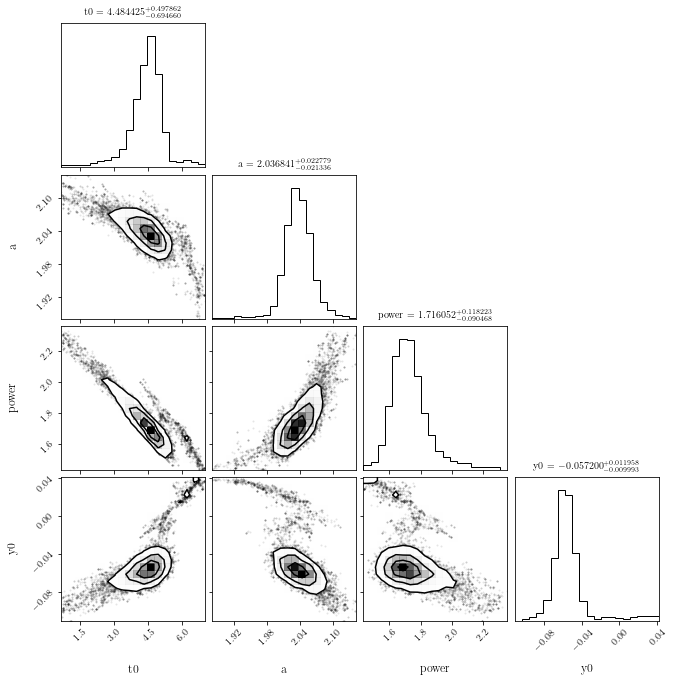

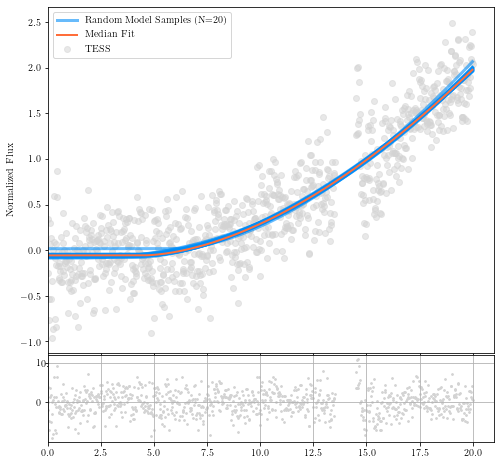

In [12]:
guess = {'t0':7, 'a':1,'power':2,'y0':-0.01} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_prime_norm, guess, scale, 
                            cutoff=20, nwalkers=10,nburn=100,nsteps=2100,
                            curveModel='decoupled', plotPercentiles=False,
                        savePlots=False,plotExt='.pdf',fileNameExtras='prime',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


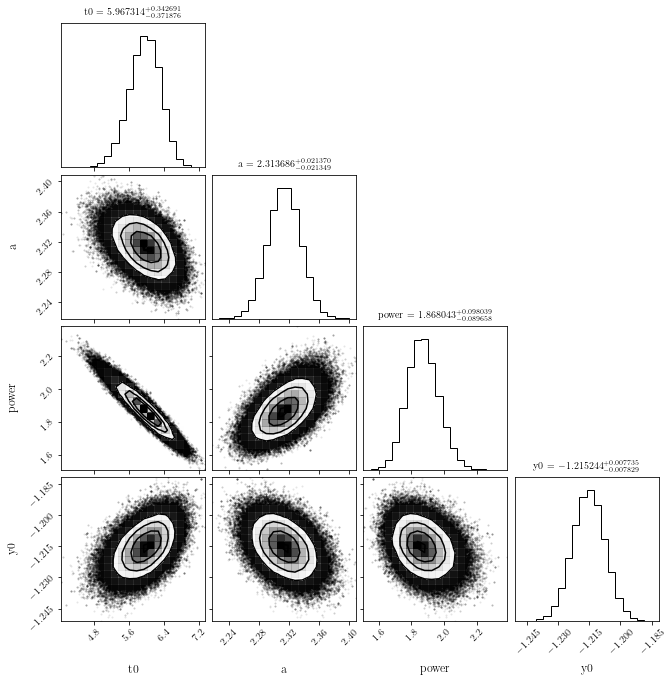

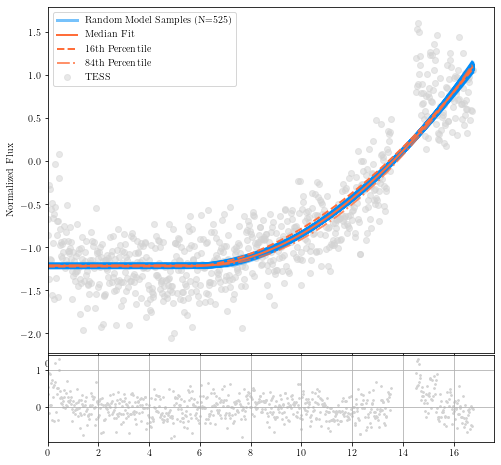

thinning Params to every 10(th/rd) row
start first loop
first loop: 35.72039175033569
start second loop
second loop: 0.0010013580322265625


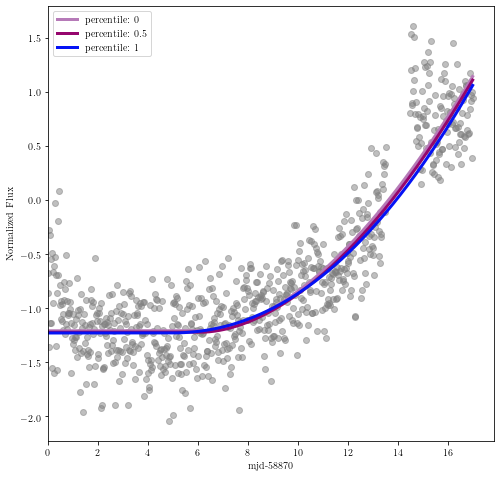

array([[ 6.28568031,  2.35086987,  1.763626  , -1.20992162],
       [ 6.13142597,  2.33157075,  1.83217048, -1.22334762],
       [ 4.88042199,  2.28950657,  2.13606006, -1.23052106]])

In [10]:
guess = {'t0':7, 'a':1,'power':2,'y0':-0.01} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=1000,nsteps=21000,
                            curveModel='dcRaw', plotPercentiles=True,
                        savePlots=True,plotExt='.pdf',fileNameExtras='percentiles',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

display(modelResidual(tess_2020bpi_s21_a_mcmc_norm[tess_2020bpi_s21_a_mcmc_norm.mjd_0 < 17],fits,
                      percentiles=[0,0.5,1],
                      curveModel='dcRaw',
              cutoff=17,debug=True,thinParams=10))

sampling...



done


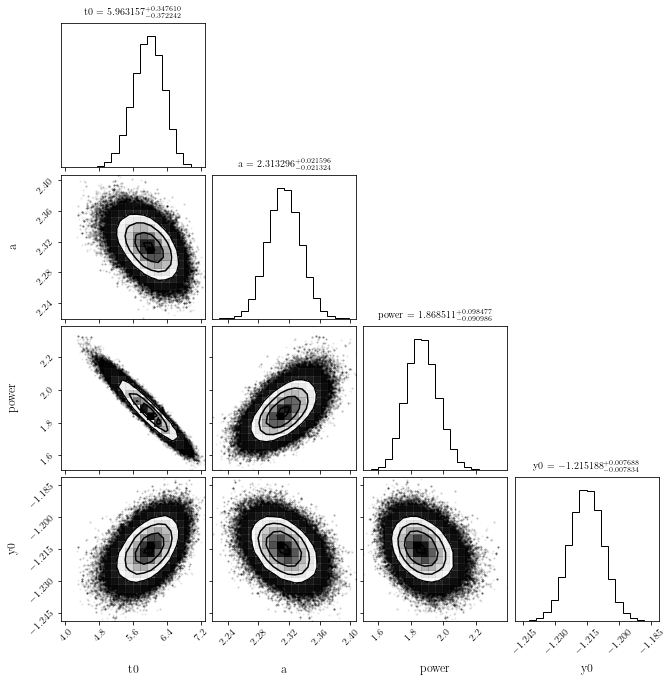

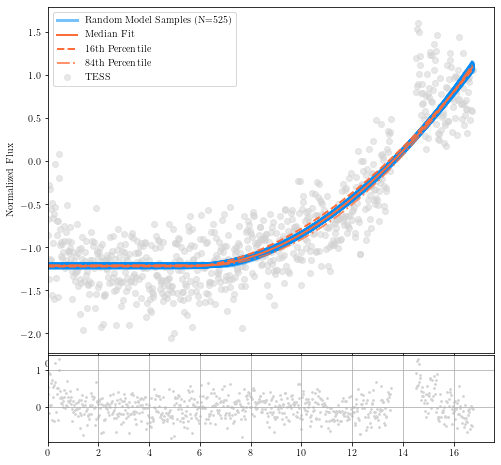

thinning Params to every 10(th/rd) row
start first loop
first loop: 36.243014335632324
start second loop
second loop: 0.002000570297241211


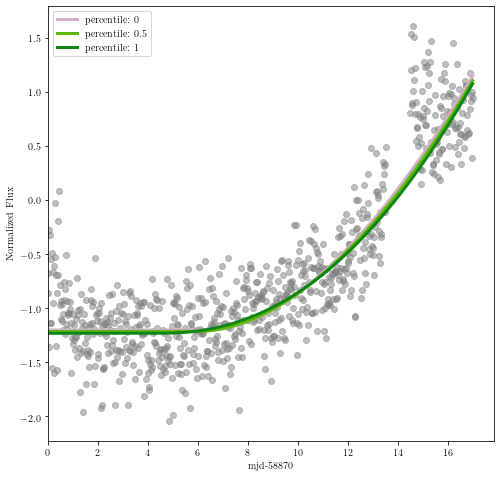

array([[ 6.50945964,  2.34839958,  1.75144819, -1.20280367],
       [ 6.00757453,  2.31946925,  1.86795036, -1.21651179],
       [ 4.51790017,  2.30731894,  2.2077791 , -1.23316473]])

In [11]:
guess = {'t0':7, 'a':1,'power':2,'y0':-0.01} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=1000,nsteps=21000,
                            curveModel='dcRaw', plotPercentiles=True,
                        savePlots=True,plotExt='.pdf',fileNameExtras='percentiles',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

display(modelResidual(tess_2020bpi_s21_a_mcmc_norm[tess_2020bpi_s21_a_mcmc_norm.mjd_0 < 17],fits,
                      percentiles=[0,0.5,1],
                      curveModel='dcRaw',
              cutoff=17,debug=True,thinParams=10))

sampling...



done


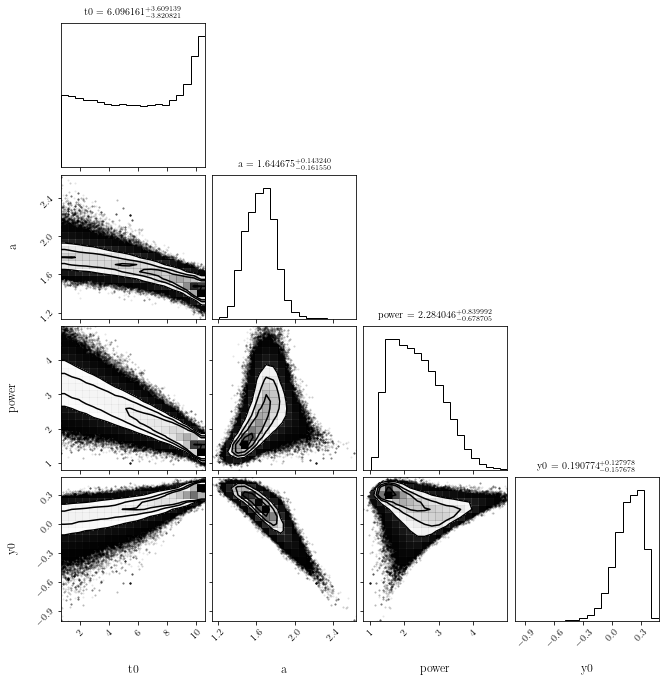

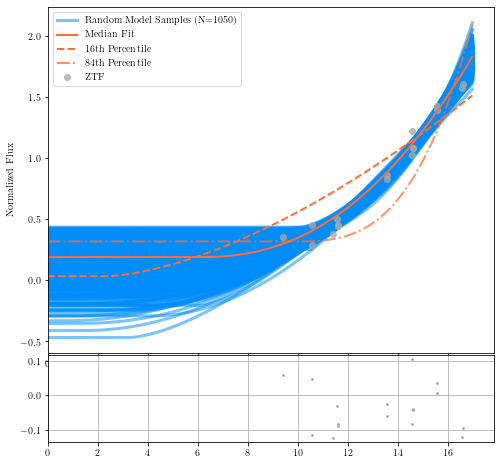

thinning Params to every 10(th/rd) row
start first loop
first loop: 17.42599892616272
start second loop
second loop: 0.005001068115234375


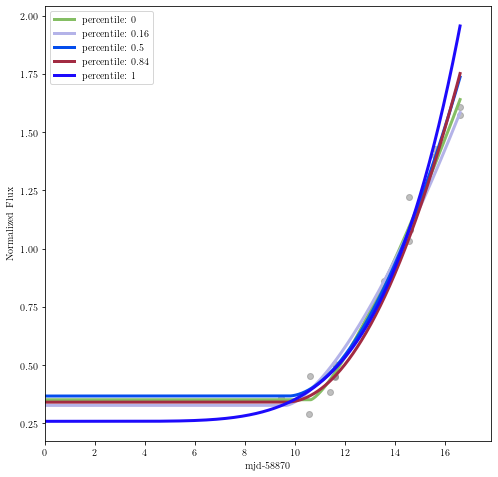

array([[10.63914707,  1.40193672,  1.32249103,  0.35134512],
       [ 9.64126028,  1.36474071,  1.49505992,  0.3269823 ],
       [ 9.7399293 ,  1.51753054,  1.85093183,  0.3671888 ],
       [ 9.620825  ,  1.57512138,  2.01205376,  0.3408466 ],
       [ 1.82817145,  1.92926504,  4.88126453,  0.25865669]])

In [7]:
guess = {'t0':6, 'a':1,'power':2,'y0':0.02} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model = hammerTime(ztf_2020bpi_norm, guess, scale, 
                         cutoff=17, nwalkers=50,nburn=1000,nsteps=21000, dataType='ZTF',
                         curveModel='decoupled',plotPercentiles=False,
                         savePlots=True,plotExt='.pdf',fileNameExtras='percentiles',
                         plotPal=('darkgrey','#008DF9','#FF6E3A'));

display(modelResidual(ztf_2020bpi_norm[ztf_2020bpi_norm.mjd_0 < 17],fits,
                      percentiles=[0,0.16,0.5,0.84,1],
                      curveModel='decoupled',
              cutoff=17,debug=True,thinParams=10))

sampling...



done


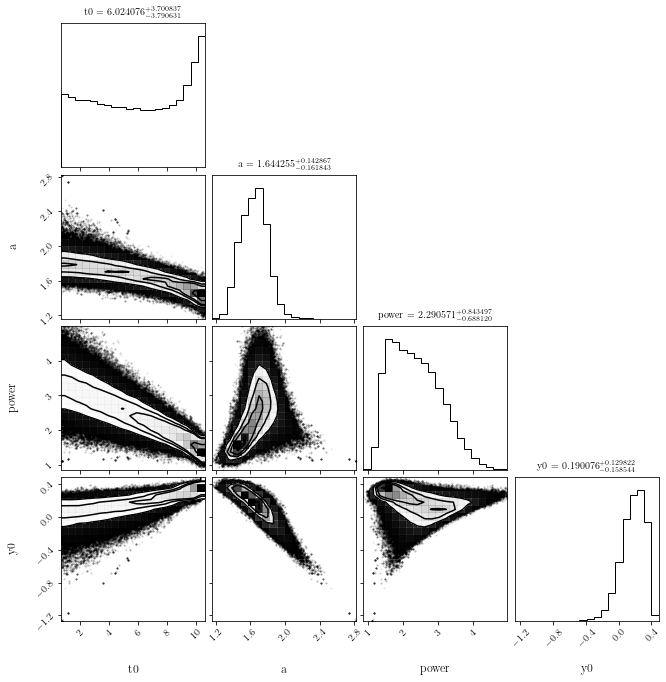

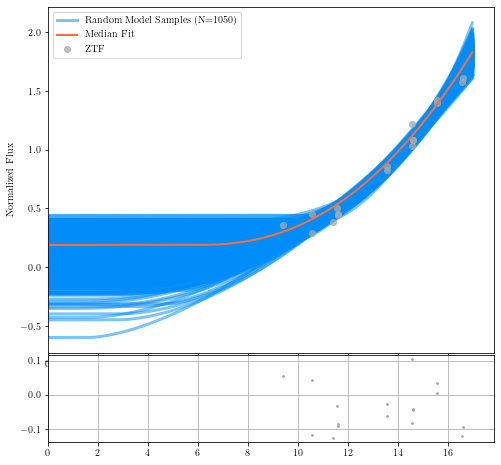

thinning Params to every 10(th/rd) row
start first loop
first loop: 17.450000524520874
start second loop
second loop: 0.0039997100830078125


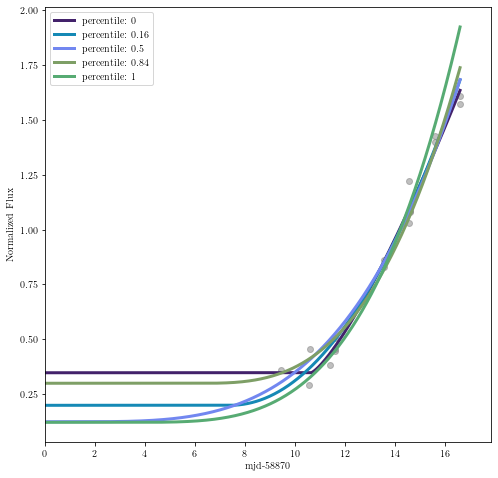

array([[10.64790684,  1.39888537,  1.30167218,  0.34706277],
       [ 7.38893086,  1.61625134,  2.04870201,  0.19865258],
       [ 1.10656795,  1.702169  ,  3.48379441,  0.12381853],
       [ 6.17896372,  1.60563471,  2.96492032,  0.29917026],
       [ 3.26297452,  2.00338384,  3.64055132,  0.12111696]])

In [8]:
guess = {'t0':6, 'a':1,'power':2,'y0':0.02} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model = hammerTime(ztf_2020bpi_norm, guess, scale, 
                         cutoff=17, nwalkers=50,nburn=1000,nsteps=21000, dataType='ZTF',
                         curveModel='decoupled',plotPercentiles=False,
                         savePlots=True,plotExt='.pdf',fileNameExtras='',
                         plotPal=('darkgrey','#008DF9','#FF6E3A'));

display(modelResidual(ztf_2020bpi_norm[ztf_2020bpi_norm.mjd_0 < 17],fits,
                      percentiles=[0,0.16,0.5,0.84,1],
                      curveModel='decoupled',
              cutoff=17,debug=True,thinParams=10))